# Imports

In [1]:
import numpy as np
import tensorflow as tf
import keras

from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19

The following codes can be run in two ways:
1. Run on your local machine using anaconda.
   - To install TensorFlow2 and Keras on Anaconda, run the following commands on the shell:\
     conda install –c conda-forge tensorflow\
     conda install –c conda-forge keras
     
   - It can also be installed using pip as follows:\
     pip install --upgrade pip\
     pip install tensorflow 
     
     
2. Run on Google Colaboratory (CoLab).
   - No installation required.
   - The images and data used in code has to be uploaded (in the files area) afresh everytime   CoLab is used. 
   - One trick around is to place all the data and images in Google Drive and mount the drive in Google Colab as shown in the following code. This will save us from uploading the images again anad again everytime use use the notebook.
     

# Using Pre-trained Models from Keras
- 10 random images are selected from https://unsplash.com/.
  The website contains high-resolution images from professional photographers.


- Performance of the following two pre-trained models from Keras is compared on these images:
  1. Inception-ResNet-v2 
  2. VGG19


- For other models, see [keras pre-trained applications](https://keras.io/api/applications/)

# Mounting Google Drive
- This code will mount my google drive on Colab.
- It is requied if Google Colab is used, not required if the code is run on Anaconda.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Constants for file names along with paths

These images have been taken from https://unsplash.com/, which contains high-resolution images from professional photographers.

In [ ]:
#Run this cell only if Google Colab is used.
#The images are placed on my google drive in a folder named Images
FILE_1='/content/gdrive/My Drive/ML_Lecture_13/Images/01_Umbrella.jpg'
FILE_2='/content/gdrive/My Drive/ML_Lecture_13/Images/02_Shoe.jpg'
FILE_3='/content/gdrive/My Drive/ML_Lecture_13/Images/03_Ocean.jpg'
FILE_4='/content/gdrive/My Drive/ML_Lecture_13/Images/04_Horse.jpg'
FILE_5='/content/gdrive/My Drive/ML_Lecture_13/Images/05_City.jpg'
FILE_6='/content/gdrive/My Drive/ML_Lecture_13/Images/06_Feet.jpg'
FILE_7='/content/gdrive/My Drive/ML_Lecture_13/Images/07_Stairs.jpg'
FILE_8='/content/gdrive/My Drive/ML_Lecture_13/Images/08_Doorway.jpg'
FILE_9='/content/gdrive/My Drive/ML_Lecture_13/Images/09_Ice_Cream.jpg'
FILE_10='/content/gdrive/My Drive/ML_Lecture_13/Images/10_Red_Shoes.jpg'

In [2]:
#Run this cell only if Anaconda is used.
#The images are placed in a folder named Images in the current working directory.
FILE_1='Images/01_Umbrella.jpg'
FILE_2='Images/02_Shoe.jpg'
FILE_3='Images/03_Ocean.jpg'
FILE_4='Images/04_Horse.jpg'
FILE_5='Images/05_City.jpg'
FILE_6='Images/06_Feet.jpg'
FILE_7='Images/07_Stairs.jpg'
FILE_8='Images/08_Doorway.jpg'
FILE_9='Images/09_Ice_Cream.jpg'
FILE_10='Images/10_Red_Shoes.jpg'

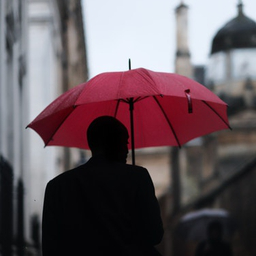

In [3]:
#Let's display one of the images here.
pic = load_img(FILE_1) #A method from Keras
display(pic)  #Display is a function in module IPython.core.display; displays a Python object in all frontends.

In [4]:
#Converting jpeg image to array
pic_arr = img_to_array(pic)  #a keras method
pic_arr
pic_arr.shape #Note that it is a 3D tensor

(256, 256, 3)

## Model 1: VGG19
- Created by researchers at oxford university UK. 
- A convolutional neural network trained on more than a million images from the ImageNet database. 
- ImageNet is a high quality database of around 14 million labelled/hand-annotated images, containing almost 22,000 separate object categories, created and maintained by Princeton and Stanford University. 
- VGG16 network is 16 layers deep and VGG19 is 19 layers deep.
- Can classify images into over 1000 object categories, such as keyboard, mouse, pencil, and many animals. 
- Every predefined model expects us to provide input in certain format.
- The VGG network requires an image input of size 224-by-224, in the form of 4D tensor of shape (samples, height, width, channels). 

### Loading the Model

In [5]:
%%time
vgg19_model = VGG19()

Wall time: 5.12 s


### Preprocessing the Input Image
- The image tensor must be of a specific resolution and specific shape.

In [6]:
#Loading image in the desired resolution, as per the model requirements.
img_m1 = load_img(FILE_1, target_size=(224,224))

#Converting the loaded image into array
img_arr_m1 = img_to_array(img_m1)

#Adding a dimension as per the model requirements, the model requires a 4D tensor.
img_expanded_m1 = np.expand_dims(img_arr_m1, axis=0)
print('Shape before expansion:',img_arr_m1.shape)
print('Shape after expansion:',img_expanded_m1.shape)

#Preprocessing the image as per the model requirements.
preprocessed_img_m1 = preprocess_input(img_expanded_m1)

Shape before expansion: (224, 224, 3)
Shape after expansion: (1, 224, 224, 3)


### Making Predictions

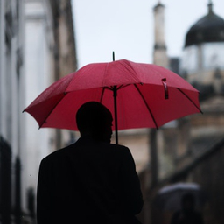

1/1 [==============================] - 1s 1s/step


[[('n03788365', 'mosquito_net', 0.20609441),
  ('n04209239', 'shower_curtain', 0.032693617),
  ('n03131574', 'crib', 0.020449536),
  ('n15075141', 'toilet_tissue', 0.018825097),
  ('n03291819', 'envelope', 0.018508377)]]

In [7]:
display(img_m1)
prediction_m1 = vgg19_model.predict(preprocessed_img_m1)
decode_vgg19(prediction_m1)

The output shows that there is a:
- 20.61% chance that the image contains a mosquito net,
- 3.27% chance that the image contains a shower curtain, 
- 2.04% chance that the image contains a crib,
- 1.88% chance that the image contains a toilet tissue, and
- 1.85% chance that the image contains an envelope.

In [ ]:
#TASK FOR YOU
#Now try running the prediction using each of the following statements and observe the output.
#Don't forget to run the decode_predictions(prediction_m1) method.
#prediction_m1 = inception_model.predict(img_m1)
#prediction_m1 = inception_model.predict(img_expanded_m1)

#Try predictions on remaining 9 images (from FILE_2 to FILE_10).

## Model 2: InceptionResNetV2
- A convolutional neural network trained on more than a million images from the ImageNet database. 
- The network is 164 layers deep and can classify images into over 1000 object categories, such as keyboard, mouse, pencil, and many animals. 
- This network requires an image input of size 299-by-299, in the form of 4D tensor of shape (samples, height, width, channels). 

### Loading the Model

In [8]:
%%time
inception_model = InceptionResNetV2(weights='imagenet')

Wall time: 10.6 s


### Preprocessing the Input Image
- The image tensor must be of a specific resolution and specific shape.

In [9]:
#Loading image in the desired resolution, as per the model requirements.
img_m2 = load_img(FILE_1, target_size=(299,299))

#Converting the loaded image into array
img_arr_m2 = img_to_array(img_m2)

#Adding a dimension as per the model requirements, the model requires a 4D tensor.
img_expanded_m2 = np.expand_dims(img_arr_m2, axis=0)
print('Shape before expansion:',img_arr_m2.shape)
print('Shape after expansion:',img_expanded_m2.shape)

#Preprocessing the image as per the model requirements.
preprocessed_img_m2 = preprocess_input(img_expanded_m2)

Shape before expansion: (299, 299, 3)
Shape after expansion: (1, 299, 299, 3)


### Making Predictions

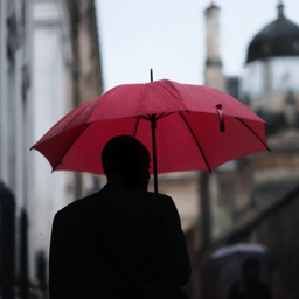

1/1 [==============================] - 6s 6s/step


[[('n04507155', 'umbrella', 0.82924384),
  ('n03792972', 'mountain_tent', 0.0012268262),
  ('n04479046', 'trench_coat', 0.0011062954),
  ('n03788195', 'mosque', 0.0010572359),
  ('n03220513', 'dome', 0.0010310991)]]

In [10]:
display(img_m2)
prediction_m2 = inception_model.predict(preprocessed_img_m2)
decode_predictions(prediction_m2)

The output shows that there is a:
- 82.92% chance that the image contains an umbrella,
- 0.12% chance that the image contains a mountain tent, 
- 0.11% chance that the image contains a trench coat,
- 0.11% chance that the image contains a mosque, and
- 0.10% chance that the image contains a dome.